# 1.4.4 Smoothing Images

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 2D Convolution (Image Filtering)

In [2]:
img = cv2.imread('opencv_logo.png')
kernel = np.ones((5,5),np.float32)/25

In [3]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

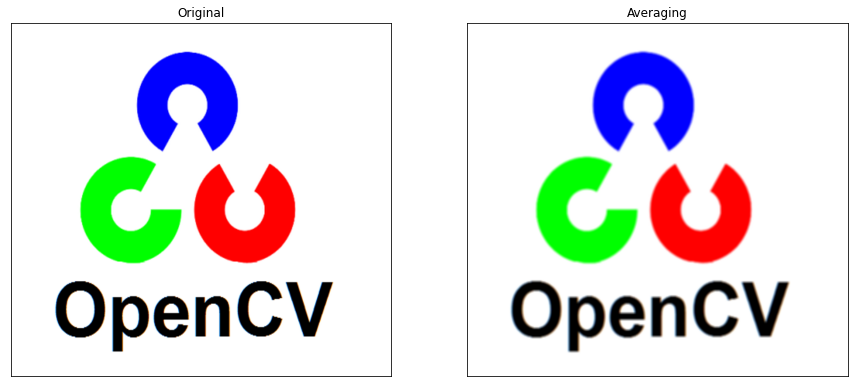

In [4]:
dst = cv2.filter2D(img,-1,kernel)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Blurring (Image Smoothing)

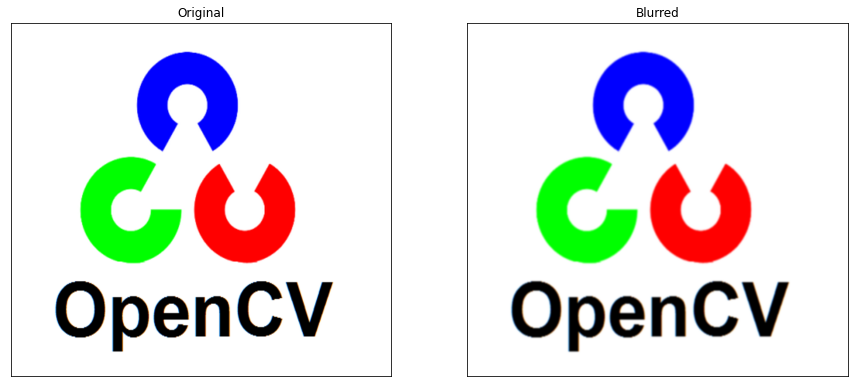

In [5]:
#blur = cv2.blur(img,(5,5))
blur = cv2.GaussianBlur(img,(5,5),0)
#blur = cv2.medianBlur(img,5)
#blur = cv2.bilateralFilter(img,9,75,75)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## Kernel Convolution

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
l=1
kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]],np.float32)

In [8]:
kernel

array([[ 0., -1.,  0.],
       [-1.,  4., -1.],
       [ 0., -1.,  0.]], dtype=float32)

In [9]:
img = np.random.randint(10, size=(12,12))
#img = np.ones((10,10),np.float32)

In [10]:
img

array([[6, 9, 0, 3, 5, 5, 5, 4, 1, 9, 5, 1],
       [9, 5, 1, 3, 1, 5, 0, 1, 1, 5, 2, 9],
       [0, 3, 6, 2, 5, 2, 9, 0, 4, 7, 1, 6],
       [5, 8, 5, 3, 3, 7, 4, 2, 7, 3, 8, 5],
       [8, 5, 3, 3, 9, 1, 6, 9, 9, 2, 3, 8],
       [5, 9, 4, 2, 3, 0, 7, 3, 2, 3, 2, 8],
       [8, 9, 4, 8, 3, 9, 7, 6, 8, 5, 3, 0],
       [6, 3, 9, 3, 2, 0, 4, 8, 4, 6, 4, 5],
       [9, 9, 2, 2, 7, 4, 0, 4, 8, 5, 2, 8],
       [3, 8, 3, 2, 0, 9, 6, 0, 7, 8, 5, 2],
       [7, 1, 4, 7, 6, 7, 3, 0, 1, 2, 3, 1],
       [6, 6, 2, 7, 5, 4, 2, 8, 2, 3, 8, 6]])

In [11]:
h,w=img.shape

In [12]:
print(h,w)

12 12


In [17]:
dst = np.zeros((h,w))

In [18]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i,j]=t        

In [49]:
img

array([[169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       ...,
       [ 53,  53,  59, ..., 115, 112, 114],
       [ 53,  53,  64, ..., 117, 118, 122],
       [ 53,  53,  64, ..., 117, 118, 122]], dtype=uint8)

In [ ]:
np.set_printoptions(threshold=320, linewidth=320)

In [50]:
dst

array([[  1,   0, 253, ...,   6,  10,  11],
       [  1,   0, 253, ...,   6,  10,  11],
       [  1,   0, 253, ...,   6,  10,  11],
       ...,
       [251,   6,   1, ...,  14,  13, 251],
       [247,   1, 252, ...,   7,   3, 248],
       [245,  19, 252, ..., 254,   3,   3]], dtype=uint8)

In [51]:
img = cv2.imread('lena.png', 0)

In [52]:
h,w=img.shape

In [53]:
dst = np.zeros((h-2*l,w-2*l),np.uint8)

In [54]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i-l,j-l]=t 

In [55]:
cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()